# Метод главных компонент и k-ближайших соседей

## Белов Никита Дмитриевич, НПМбд-01-19

In [14]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

Загружаем digits и выводим картинки

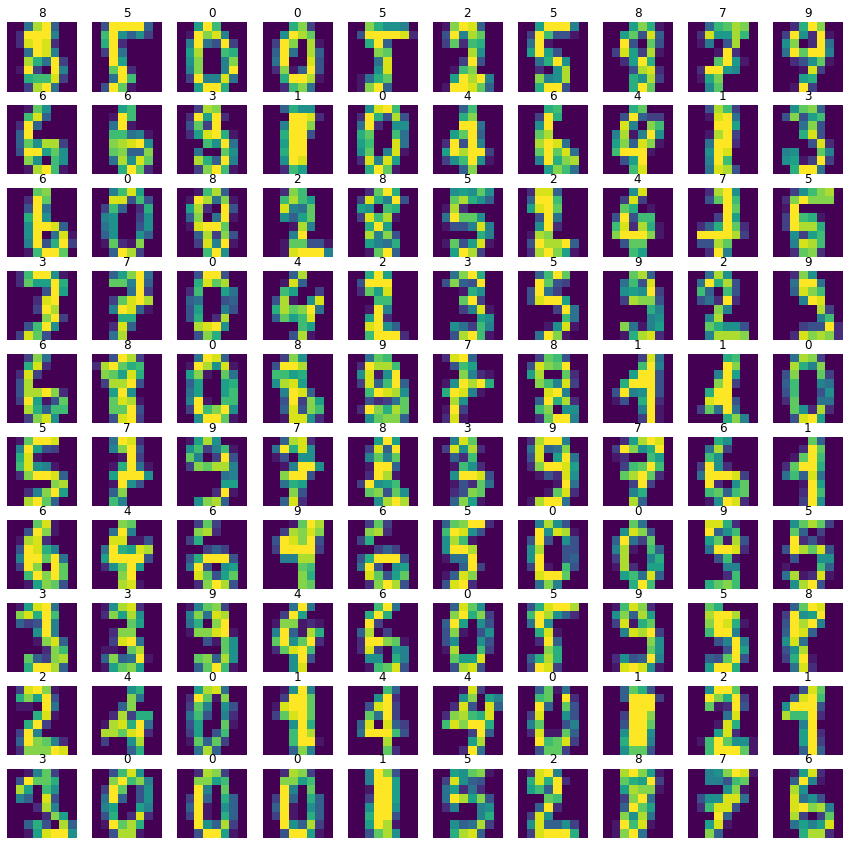

In [22]:
digits = load_digits()
X = digits['data']
labels = digits['target']
fig, ax = plt.subplots(10, 10, figsize=(15, 15))
for i in range(10):
    for j in range(10):
        t = np.random.randint(0, 1797)
        ax[i, j].imshow(X[t,:].reshape(8,8))
        ax[i, j].set_title(labels[t])
        ax[i, j].axis('off')

## Aлгоритм PCA

Метод init() сохраняет число компонент.

Метод fit() - центрирование данных $X_c = X - \overline(X)$, вычисление ковариационной матрицы $C = X_c^T \cdot X_c$ и
нахождение собственных векторов $F$ и собственных значений $\lambda$ этой матрицы.

Метод transform() - смена координат в новом базисе $Y = X_c \cdot F$.

Метод fit_transform() - решение задачи.

In [29]:
class my_PCA():
    
    '''
    n_compoments -число компонент
    '''
    
    def __init__(self, n_components=None):
        self.n_components = n_components
    
    def fit(self, X):
        Xc = X
        m = np.mean(Xc, axis = 0)
        Xc -= m
        C = Xc.T.dot(Xc)
        l, F = np.linalg.eigh(C)
        l = l[::-1]
        F = F[:, ::-1]
        return Xc, F, l
        
    def transform(self, X, F):
        return X.dot(F)

    def fit_transform(self, X):
        Xc1, F, lambda_ = self.fit(X)
        Y = self.transform(Xc1, F)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y

In [30]:
test = my_PCA(2)

Смотрим на собственные значения матрицы ковариации и на их кумулятивную сумму. Основной вклад вносят первые собственные значения.

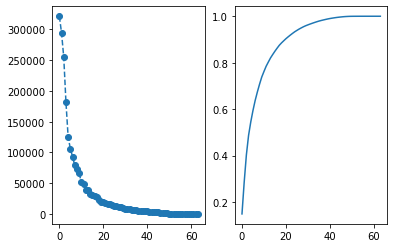

In [33]:
_, _, l = test.fit(X)
plt.subplot(1,2,1)
plt.plot(l, marker = 'o', linestyle = '--')
plt.subplot(1,2,2)
plt.plot(np.cumsum(l) / np.sum(l))

Изобразим на графике точки нашего датасета, оставив только 2 главные координаты. Каждой цифре-кластеру соответствует свой цвет.

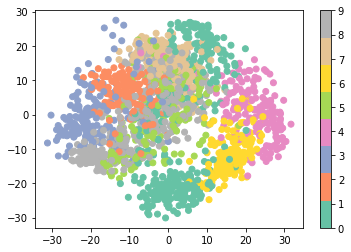

In [32]:
Y = test.fit_transform(X)
plt.scatter(Y[:, 0], Y[:, 1], c = labels, cmap = 'Set2')
plt.colorbar()

## Aлгоритм kNN

Метод init() - число соседей, по умолчанию их 5.

Метод fit() - обучающие данные.

Метод predict() - вычисление возможного класса, к которому принадлежит тестируемый объект. Для этого необходимо вычислить расстояние от тестируемой точки до остальных точек в базе. Далее находим k соседей и смотрим, к какому классу они принадлежат. Класс, к которому принадлежит большее число соседей, и будет классом нашей точки.

In [34]:
class my_kNN():
    
    def __init__(self, n_neighbours = 5):
        self.n_neighbours = n_neighbours
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        x_class = list()
        for item in X: 
            dist = list() 
            for i in self.X_train:
                #вычисляем расстояние от точки до каждого элемента X_train
                dist_i = np.linalg.norm(np.array(item) - np.array(i)) 
                dist.append(dist_i)
            dist = np.array(dist)
            #вычисляем индексы первых k минимальных расстояний
            min_dist_arg = np.argsort(dist)[:self.n_neighbours] 
            min_dist_labels = list()
            for i in min_dist_arg:
                #индексы соседей
                min_dist_labels.append(self.y_train[i]) 
            #вычисляем уникальные индексы и их количество
            values, counts = np.unique(min_dist_labels, return_counts = True) 
            #находим максимальное число вхождений
            possible_label = values[np.argmax(counts)]
            x_class.append(possible_label)
        return x_class

Узнаем точность вычислений при разном числе соседей и разном количестве главных компонент

Изначальный датасет

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 1500, random_state=42)
test_k_2 = my_kNN(2)
test_k_2.fit(X_train, y_train)
y_k_2 = test_k_2.predict(X_test)
print("Точность при k = 2:", accuracy_score(y_test, y_k_2) * 100)
test_k_5 = my_kNN()
test_k_5.fit(X_train, y_train)
y_k_5 = test_k_5.predict(X_test)
print("Точность при k = 5:", accuracy_score(y_test, y_k_5) * 100)
test_k_7 = my_kNN(7)
test_k_7.fit(X_train, y_train)
y_k_7 = test_k_7.predict(X_test)
print("Точность при k = 7:", accuracy_score(y_test, y_k_7) * 100)
test_k_15 = my_kNN(15)
test_k_15.fit(X_train, y_train)
y_k_15 = test_k_15.predict(X_test)
print("Точность при k = 15:", accuracy_score(y_test, y_k_15) * 100)
test_k_30 = my_kNN(30)
test_k_30.fit(X_train, y_train)
y_k_30 = test_k_30.predict(X_test)
print("Точность при k = 30:", accuracy_score(y_test, y_k_30) * 100)

Точность при k = 2: 94.86666666666666
Точность при k = 5: 94.73333333333333
Точность при k = 7: 93.60000000000001
Точность при k = 15: 91.26666666666667
Точность при k = 30: 86.33333333333333


2 главные компоненты

In [44]:
test = my_PCA(2)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = my_kNN(2)
test_k_2.fit(X_train, y_train)
y_k_2 = test_k_2.predict(X_test)
print("Точность при k = 2:", accuracy_score(y_test, y_k_2) * 100)
test_k_5 = my_kNN()
test_k_5.fit(X_train, y_train)
y_k_5 = test_k_5.predict(X_test)
print("Точность при k = 5:", accuracy_score(y_test, y_k_5) * 100)
test_k_7 = my_kNN(7)
test_k_7.fit(X_train, y_train)
y_k_7 = test_k_7.predict(X_test)
print("Точность при k = 7:", accuracy_score(y_test, y_k_7) * 100)
test_k_15 = my_kNN(15)
test_k_15.fit(X_train, y_train)
y_k_15 = test_k_15.predict(X_test)
print("Точность при k = 15:", accuracy_score(y_test, y_k_15) * 100)
test_k_30 = my_kNN(30)
test_k_30.fit(X_train, y_train)
y_k_30 = test_k_30.predict(X_test)
print("Точность при k = 30:", accuracy_score(y_test, y_k_30) * 100)

Точность при k = 2: 54.93333333333334
Точность при k = 5: 60.266666666666666
Точность при k = 7: 60.93333333333333
Точность при k = 15: 62.93333333333333
Точность при k = 30: 62.2


5 главных компонент

In [45]:
test = my_PCA(5)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = my_kNN(2)
test_k_2.fit(X_train, y_train)
y_k_2 = test_k_2.predict(X_test)
print("Точность при k = 2:", accuracy_score(y_test, y_k_2) * 100)
test_k_5 = my_kNN()
test_k_5.fit(X_train, y_train)
y_k_5 = test_k_5.predict(X_test)
print("Точность при k = 5:", accuracy_score(y_test, y_k_5) * 100)
test_k_7 = my_kNN(7)
test_k_7.fit(X_train, y_train)
y_k_7 = test_k_7.predict(X_test)
print("Точность при k = 7:", accuracy_score(y_test, y_k_7) * 100)
test_k_15 = my_kNN(15)
test_k_15.fit(X_train, y_train)
y_k_15 = test_k_15.predict(X_test)
print("Точность при k = 15:", accuracy_score(y_test, y_k_15) * 100)
test_k_30 = my_kNN(30)
test_k_30.fit(X_train, y_train)
y_k_30 = test_k_30.predict(X_test)
print("Точность при k = 30:", accuracy_score(y_test, y_k_30) * 100)

Точность при k = 2: 85.86666666666667
Точность при k = 5: 89.26666666666667
Точность при k = 7: 88.2
Точность при k = 15: 86.8
Точность при k = 30: 83.26666666666667


10 главных компонент

In [46]:
test = my_PCA(10)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = my_kNN(2)
test_k_2.fit(X_train, y_train)
y_k_2 = test_k_2.predict(X_test)
print("Точность при k = 2:", accuracy_score(y_test, y_k_2) * 100)
test_k_5 = my_kNN()
test_k_5.fit(X_train, y_train)
y_k_5 = test_k_5.predict(X_test)
print("Точность при k = 5:", accuracy_score(y_test, y_k_5) * 100)
test_k_7 = my_kNN(7)
test_k_7.fit(X_train, y_train)
y_k_7 = test_k_7.predict(X_test)
print("Точность при k = 7:", accuracy_score(y_test, y_k_7) * 100)
test_k_15 = my_kNN(15)
test_k_15.fit(X_train, y_train)
y_k_15 = test_k_15.predict(X_test)
print("Точность при k = 15:", accuracy_score(y_test, y_k_15) * 100)
test_k_30 = my_kNN(30)
test_k_30.fit(X_train, y_train)
y_k_30 = test_k_30.predict(X_test)
print("Точность при k = 30:", accuracy_score(y_test, y_k_30) * 100)

Точность при k = 2: 93.53333333333333
Точность при k = 5: 91.86666666666666
Точность при k = 7: 91.66666666666666
Точность при k = 15: 89.2
Точность при k = 30: 86.93333333333332


15 главных компонент

In [47]:
test = my_PCA(15)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = my_kNN(2)
test_k_2.fit(X_train, y_train)
y_k_2 = test_k_2.predict(X_test)
print("Точность при k = 2:", accuracy_score(y_test, y_k_2) * 100)
test_k_5 = my_kNN()
test_k_5.fit(X_train, y_train)
y_k_5 = test_k_5.predict(X_test)
print("Точность при k = 5:", accuracy_score(y_test, y_k_5) * 100)
test_k_7 = my_kNN(7)
test_k_7.fit(X_train, y_train)
y_k_7 = test_k_7.predict(X_test)
print("Точность при k = 7:", accuracy_score(y_test, y_k_7) * 100)
test_k_15 = my_kNN(15)
test_k_15.fit(X_train, y_train)
y_k_15 = test_k_15.predict(X_test)
print("Точность при k = 15:", accuracy_score(y_test, y_k_15) * 100)
test_k_30 = my_kNN(30)
test_k_30.fit(X_train, y_train)
y_k_30 = test_k_30.predict(X_test)
print("Точность при k = 30:", accuracy_score(y_test, y_k_30) * 100)

Точность при k = 2: 94.93333333333334
Точность при k = 5: 94.06666666666666
Точность при k = 7: 93.13333333333334
Точность при k = 15: 90.73333333333333
Точность при k = 30: 87.46666666666667


29 главных компонент

In [55]:
test = my_PCA(29)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = my_kNN(2)
test_k_2.fit(X_train, y_train)
y_k_2 = test_k_2.predict(X_test)
print("Точность при k = 2:", accuracy_score(y_test, y_k_2) * 100)
test_k_5 = my_kNN()
test_k_5.fit(X_train, y_train)
y_k_5 = test_k_5.predict(X_test)
print("Точность при k = 5:", accuracy_score(y_test, y_k_5) * 100)
test_k_7 = my_kNN(7)
test_k_7.fit(X_train, y_train)
y_k_7 = test_k_7.predict(X_test)
print("Точность при k = 7:", accuracy_score(y_test, y_k_7) * 100)
test_k_15 = my_kNN(15)
test_k_15.fit(X_train, y_train)
y_k_15 = test_k_15.predict(X_test)
print("Точность при k = 15:", accuracy_score(y_test, y_k_15) * 100)
test_k_30 = my_kNN(30)
test_k_30.fit(X_train, y_train)
y_k_30 = test_k_30.predict(X_test)
print("Точность при k = 30:", accuracy_score(y_test, y_k_30) * 100)

Точность при k = 2: 95.06666666666666
Точность при k = 5: 95.0
Точность при k = 7: 93.8
Точность при k = 15: 91.46666666666667
Точность при k = 30: 86.53333333333333


30 главных компонент

In [51]:
test = my_PCA(30)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = my_kNN(2)
test_k_2.fit(X_train, y_train)
y_k_2 = test_k_2.predict(X_test)
print("Точность при k = 2:", accuracy_score(y_test, y_k_2) * 100)
test_k_5 = my_kNN()
test_k_5.fit(X_train, y_train)
y_k_5 = test_k_5.predict(X_test)
print("Точность при k = 5:", accuracy_score(y_test, y_k_5) * 100)
test_k_7 = my_kNN(7)
test_k_7.fit(X_train, y_train)
y_k_7 = test_k_7.predict(X_test)
print("Точность при k = 7:", accuracy_score(y_test, y_k_7) * 100)
test_k_15 = my_kNN(15)
test_k_15.fit(X_train, y_train)
y_k_15 = test_k_15.predict(X_test)
print("Точность при k = 15:", accuracy_score(y_test, y_k_15) * 100)
test_k_30 = my_kNN(30)
test_k_30.fit(X_train, y_train)
y_k_30 = test_k_30.predict(X_test)
print("Точность при k = 30:", accuracy_score(y_test, y_k_30) * 100)

Точность при k = 2: 95.39999999999999
Точность при k = 5: 95.13333333333334
Точность при k = 7: 93.86666666666666
Точность при k = 15: 91.26666666666667
Точность при k = 30: 86.6


32 главных компонент

In [54]:
test = my_PCA(31)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = my_kNN(2)
test_k_2.fit(X_train, y_train)
y_k_2 = test_k_2.predict(X_test)
print("Точность при k = 2:", accuracy_score(y_test, y_k_2) * 100)
test_k_5 = my_kNN()
test_k_5.fit(X_train, y_train)
y_k_5 = test_k_5.predict(X_test)
print("Точность при k = 5:", accuracy_score(y_test, y_k_5) * 100)
test_k_7 = my_kNN(7)
test_k_7.fit(X_train, y_train)
y_k_7 = test_k_7.predict(X_test)
print("Точность при k = 7:", accuracy_score(y_test, y_k_7) * 100)
test_k_15 = my_kNN(15)
test_k_15.fit(X_train, y_train)
y_k_15 = test_k_15.predict(X_test)
print("Точность при k = 15:", accuracy_score(y_test, y_k_15) * 100)
test_k_30 = my_kNN(30)
test_k_30.fit(X_train, y_train)
y_k_30 = test_k_30.predict(X_test)
print("Точность при k = 30:", accuracy_score(y_test, y_k_30) * 100)

Точность при k = 2: 95.33333333333334
Точность при k = 5: 94.86666666666666
Точность при k = 7: 93.66666666666667
Точность при k = 15: 91.26666666666667
Точность при k = 30: 86.6


35 главных компонент

In [52]:
test = my_PCA(35)
Y = test.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(Y, labels, test_size = 1500, random_state=42)
test_k_2 = my_kNN(2)
test_k_2.fit(X_train, y_train)
y_k_2 = test_k_2.predict(X_test)
print("Точность при k = 2:", accuracy_score(y_test, y_k_2) * 100)
test_k_5 = my_kNN()
test_k_5.fit(X_train, y_train)
y_k_5 = test_k_5.predict(X_test)
print("Точность при k = 5:", accuracy_score(y_test, y_k_5) * 100)
test_k_7 = my_kNN(7)
test_k_7.fit(X_train, y_train)
y_k_7 = test_k_7.predict(X_test)
print("Точность при k = 7:", accuracy_score(y_test, y_k_7) * 100)
test_k_15 = my_kNN(15)
test_k_15.fit(X_train, y_train)
y_k_15 = test_k_15.predict(X_test)
print("Точность при k = 15:", accuracy_score(y_test, y_k_15) * 100)
test_k_30 = my_kNN(30)
test_k_30.fit(X_train, y_train)
y_k_30 = test_k_30.predict(X_test)
print("Точность при k = 30:", accuracy_score(y_test, y_k_30) * 100)

Точность при k = 2: 95.0
Точность при k = 5: 94.86666666666666
Точность при k = 7: 93.73333333333333
Точность при k = 15: 91.73333333333333
Точность при k = 30: 86.2


## Вывод:
Наибольшая точность наблюдается при k = 2, n_components = 30